In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull

In [2]:
df = pd.read_csv('Sociograma.csv', index_col=0)
df = df.replace(np.nan, '')

In [3]:
mapa_valores_ajustado = {
    "3": 3, "2": 2, "1": 1,
    "-3": -3, "-2": -2, "-1": -1,
    "2!": 1.5, "-1!!": 1.5,
    "1!": 0.5, "!!": 0.5, "-1!": 0.5,
    "1!!": -1.5, "-2!": -1.5,
    "": 0
}
df_numerico = df.replace(mapa_valores_ajustado)
sumatorio_filas = df_numerico.sum(axis=1)
orden = sumatorio_filas.sort_values(ascending=False).index

df = df.loc[orden, orden]
df_numerico = df_numerico.loc[orden, orden]
df['sumatorio'] = sumatorio_filas.loc[orden]
df_numerico['sumatorio'] = sumatorio_filas.loc[orden]
#ordenamos por sumatorio
df_numerico = df_numerico.sort_values(by = 'sumatorio',ascending=False)

C:\Users\jorge\AppData\Local\Temp\ipykernel_16152\3463705964.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numerico = df.replace(mapa_valores_ajustado)


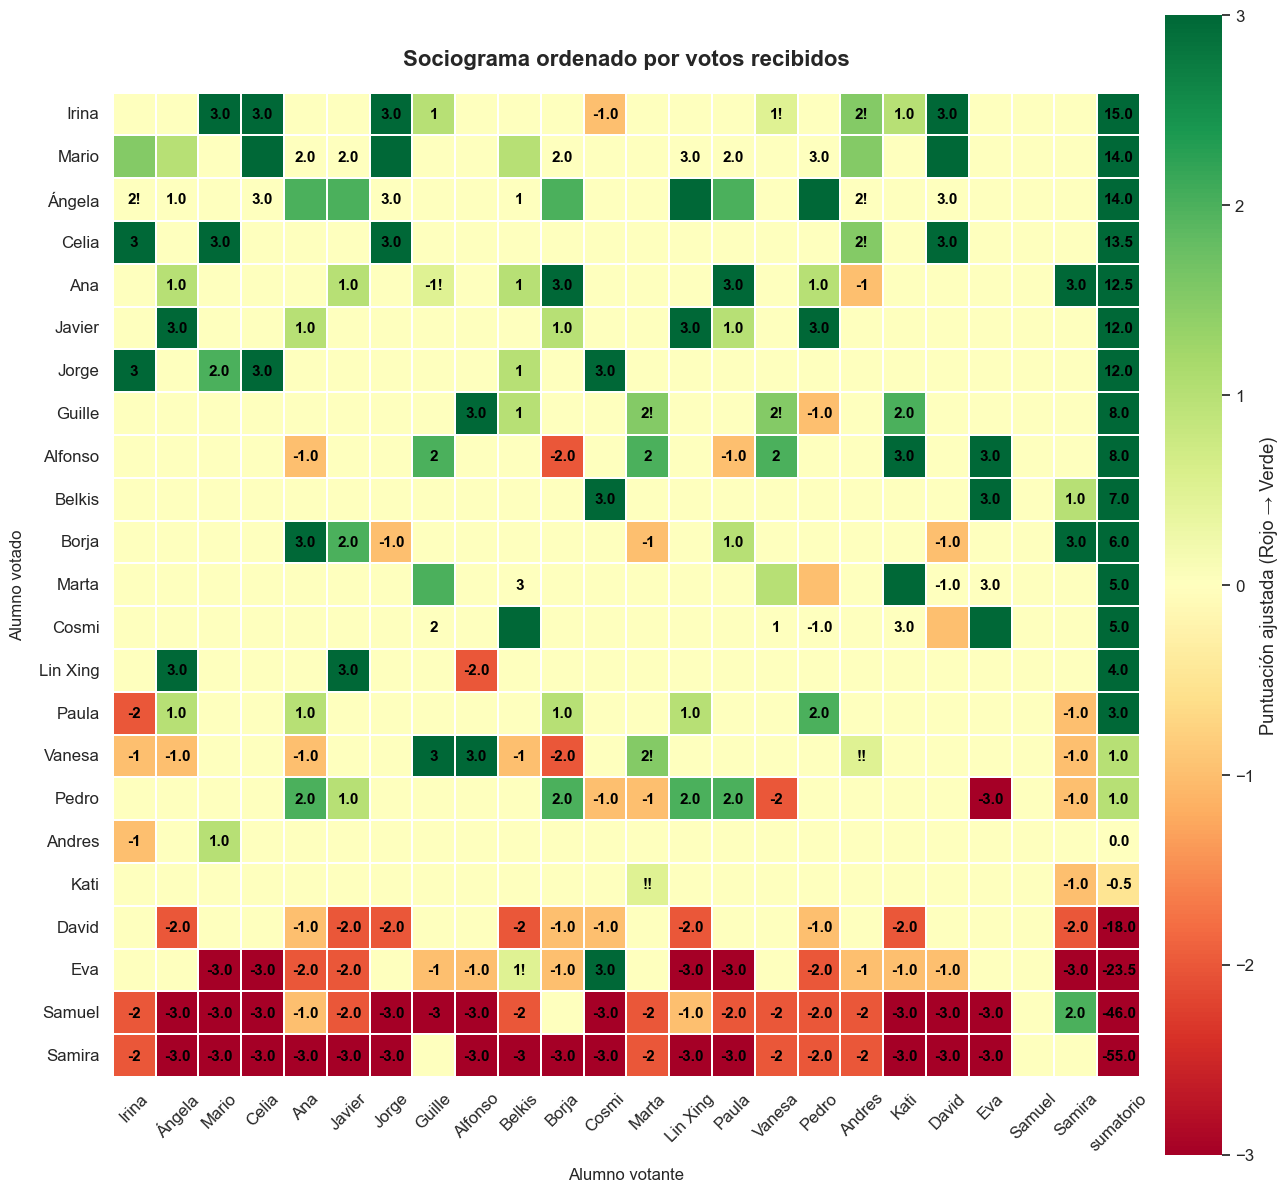

In [4]:
n = len(df_numerico)
plt.figure(figsize=(n * 0.6, n * 0.6))

# Paleta y estilo
sns.set(font_scale=1.1, style='white')

# Dibujar heatmap mejorado
ax = sns.heatmap(
    df_numerico,
    annot=df,        #Metemos los valores originales, no los numéricos
    cmap='RdYlGn',
    vmin=-3, vmax=3, center=0,
    fmt='',
    linewidths=0.3,
    linecolor='white',
    square=True,
    cbar_kws={
        'label': 'Puntuación ajustada (Rojo → Verde)',
        'shrink': 0.85,           # más corto
        'pad': 0.02
    },
    annot_kws={
        'fontsize': 11,
        'weight': 'bold',
        'color': 'black'
    }
)

# Estética general
ax.set_title('Sociograma ordenado por votos recibidos', fontsize=16, pad=20, weight='bold')
ax.set_xlabel('Alumno votante', fontsize=12, labelpad=10)
ax.set_ylabel('Alumno votado', fontsize=12, labelpad=10)
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=0)
plt.tight_layout()

plt.savefig('sociograma_heatmap_corregido.png')
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_16152\2231130729.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
c:\Users\jorge\anaconda3\envs\jorge\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jorge\anaconda3\envs\jorge\Lib\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this w

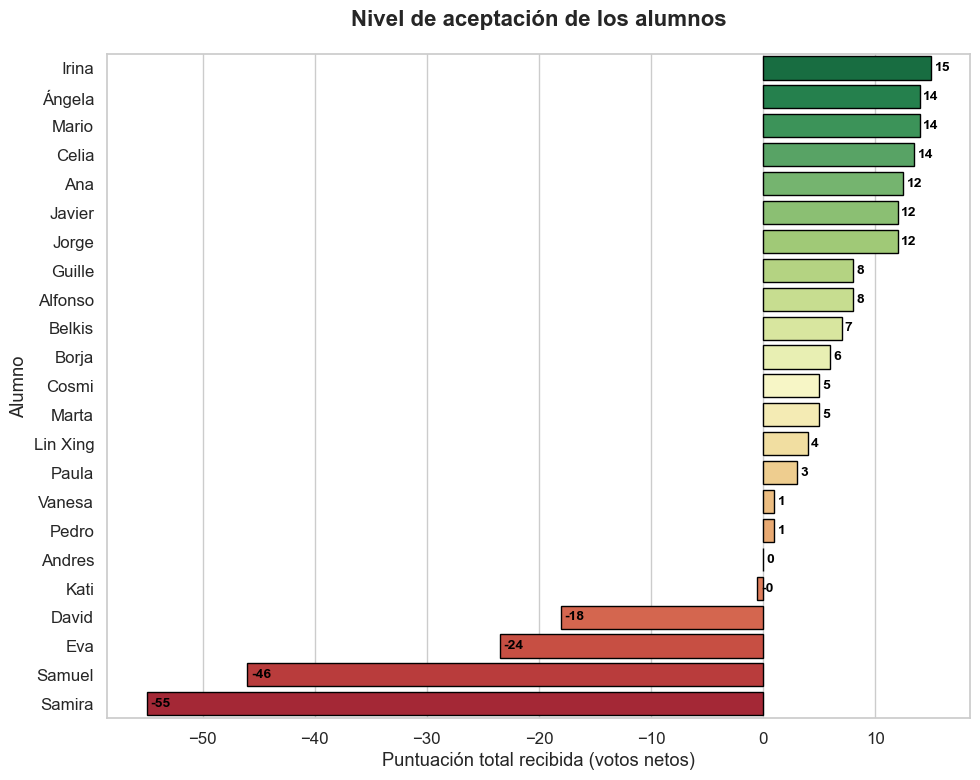

In [5]:
#alculamos aceptación neta (votos recibidos)
aceptacion = df_numerico['sumatorio']

#Ordenamos correctamente: de MAYOR a MENOR
df_aceptacion = (
    pd.DataFrame({
        'Alumno': aceptacion.index,
        'Puntuación total recibida': aceptacion.values
    })
    .sort_values(by='Puntuación total recibida', ascending=False)  # 👈 más positivos arriba
    .reset_index(drop=True)
)

#Configuración estética
sns.set(style='whitegrid', font_scale=1.1)
plt.figure(figsize=(10, 8))

#Gráfico de barras horizontales
ax = sns.barplot(
    data=df_aceptacion,
    y='Alumno',
    x='Puntuación total recibida',
    palette='RdYlGn_r',   # 👈 invertimos la paleta: más verde = más aceptado
    edgecolor='black'
)

#Etiquetas de valor
for i, v in enumerate(df_aceptacion['Puntuación total recibida']):
    ax.text(v + (0.02 * df_aceptacion['Puntuación total recibida'].max()), i, f'{v:.0f}',
            va='center', fontsize=10, weight='bold', color='black')

#Estética general
plt.title('Nivel de aceptación de los alumnos', fontsize=16, weight='bold', pad=20)
plt.xlabel('Puntuación total recibida (votos netos)')
plt.ylabel('Alumno')
plt.tight_layout()
plt.savefig('NivelAceptacion.png')
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_16152\1528791228.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
c:\Users\jorge\anaconda3\envs\jorge\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jorge\anaconda3\envs\jorge\Lib\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this w

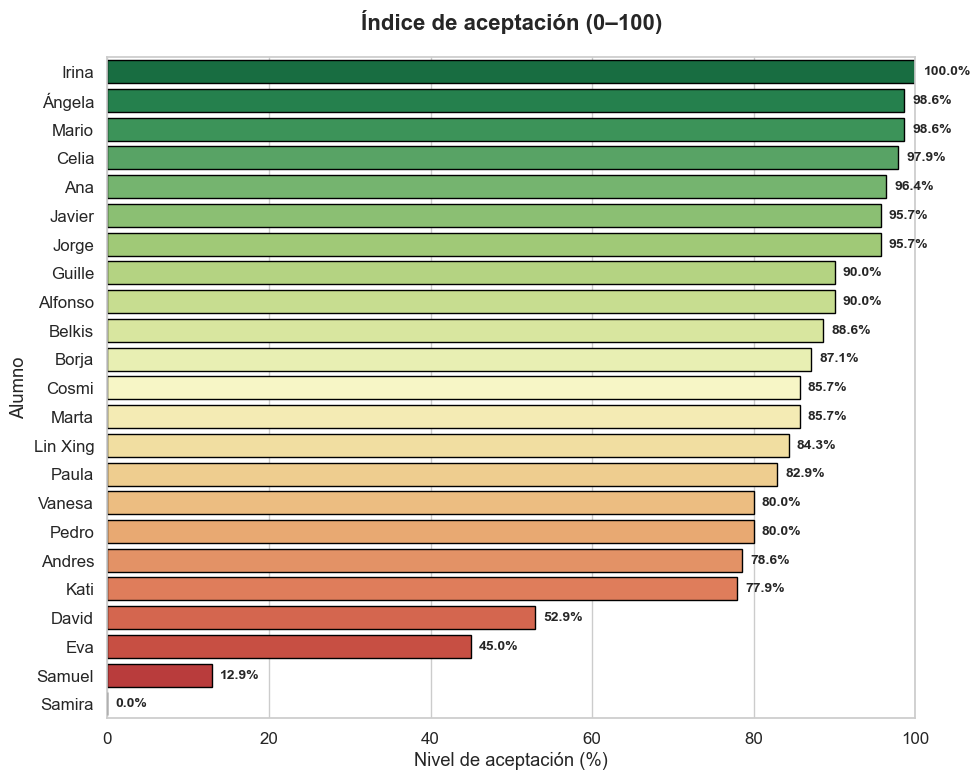

In [6]:
#Normalizamos
min_val = df_aceptacion['Puntuación total recibida'].min()
max_val = df_aceptacion['Puntuación total recibida'].max()
df_aceptacion['Índice de aceptación (%)'] = (
    (df_aceptacion['Puntuación total recibida'] - min_val) /
    (max_val - min_val) * 100
).round(1)

sns.set(style='whitegrid', font_scale=1.1)
plt.figure(figsize=(10, 8))

ax = sns.barplot(
    data=df_aceptacion,
    y='Alumno',
    x='Índice de aceptación (%)',
    palette='RdYlGn_r',   
    edgecolor='black'
)

for i, v in enumerate(df_aceptacion['Índice de aceptación (%)']):
    ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10, weight='bold')

# --- 7️⃣ Ajustes visuales ---
plt.title('Índice de aceptación (0–100)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Nivel de aceptación (%)')
plt.ylabel('Alumno')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('NivelAceptacion100.png')
plt.show()

In [7]:
df_numerico = df_numerico.drop('sumatorio', axis=1)

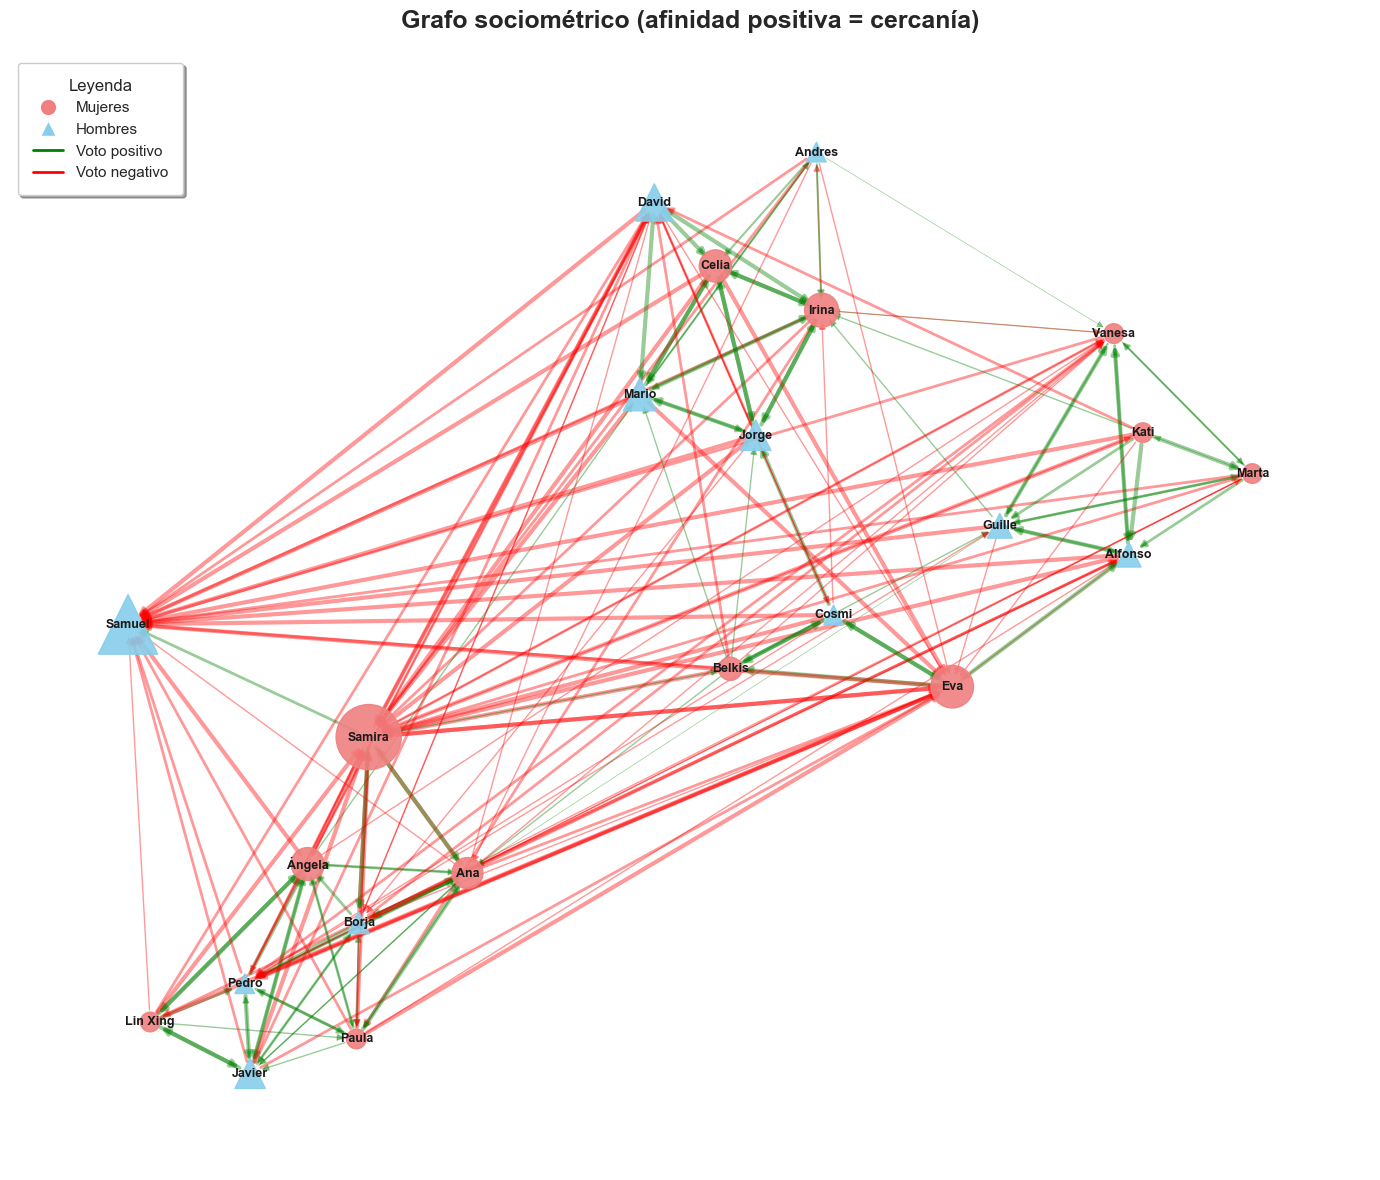

In [8]:
mujeres = [
    'Irina','Ángela','Celia','Ana','Belkis','Marta','Lin Xing',
    'Paula','Vanesa','Kati','Eva','Samira'
]
hombres = [
    'Mario','Javier','Jorge','Guille','Alfonso','Borja','Cosmi',
    'Pedro','Andres','David','Samuel'
]


# --- 2️⃣ Normalizamos nombres ---
df_numerico.index = df_numerico.index.str.strip()
df_numerico.columns = df_numerico.columns.str.strip()

# --- 3️⃣ Creamos el grafo ---
G = nx.DiGraph()

aceptacion = df_numerico.sum(axis=1)

# Añadimos nodos con atributos
for alumno in df_numerico.index:
    if alumno in mujeres:
        genero = 'F'
    elif alumno in hombres:
        genero = 'M'
    else:
        genero = 'U'
    G.add_node(alumno, genero=genero, aceptacion=aceptacion.get(alumno, 0))

# Añadimos aristas (con pesos positivos y negativos)
for votado in df_numerico.index:
    for votante in df_numerico.columns:
        valor = df_numerico.loc[votado, votante]
        if pd.notna(valor) and valor != 0:
            G.add_edge(votante, votado, weight=valor)

# --- 4️⃣ Creamos una versión ponderada por afinidad positiva ---
# Esto sirve solo para calcular el layout
G_pos = nx.Graph()
for u, v, data in G.edges(data=True):
    if data['weight'] > 0:
        G_pos.add_edge(u, v, weight=data['weight'])

# --- 5️⃣ Layout: nodos con afinidad positiva estarán más cerca ---
pos = nx.spring_layout(G_pos, seed=42, k=1.5, iterations=300, weight='weight')

# --- 6️⃣ Figura y estilo ---
plt.figure(figsize=(14, 12))
plt.style.use('seaborn-v0_8-white')

# Tamaño de nodos proporcional a aceptación
tamanos = [max(200, abs(G.nodes[n]['aceptacion']) * 40) for n in G.nodes]

# --- 7️⃣ Dibujamos nodos ---
nx.draw_networkx_nodes(G, pos,
    nodelist=[n for n, d in G.nodes(data=True) if d['genero'] == 'F'],
    node_color='lightcoral', node_shape='o',
    node_size=[tamanos[i] for i, n in enumerate(G.nodes) if G.nodes[n]['genero'] == 'F'],
    label='Mujeres', alpha=0.9
)

nx.draw_networkx_nodes(G, pos,
    nodelist=[n for n, d in G.nodes(data=True) if d['genero'] == 'M'],
    node_color='skyblue', node_shape='^',
    node_size=[tamanos[i] for i, n in enumerate(G.nodes) if G.nodes[n]['genero'] == 'M'],
    label='Hombres', alpha=0.9
)

# --- 8️⃣ Dibujamos aristas ---
edges = G.edges(data=True)
colors = ['green' if d['weight'] > 0 else 'red' for (_, _, d) in edges]
widths = [abs(d['weight']) for (_, _, d) in edges]

nx.draw_networkx_edges(G, pos, edge_color=colors, width=widths, arrows=True, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# --- Leyenda personalizada ---
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Mujeres',
           markerfacecolor='lightcoral', markersize=12),
    Line2D([0], [0], marker='^', color='w', label='Hombres',
           markerfacecolor='skyblue', markersize=12),
    Line2D([0], [0], color='green', lw=2, label='Voto positivo'),
    Line2D([0], [0], color='red', lw=2, label='Voto negativo')
]

plt.legend(
    handles=legend_elements,
    loc='upper left',
    fontsize=11,
    frameon=True,
    title='Leyenda',
    title_fontsize=12,
    fancybox=True,
    shadow=True,
    borderpad=1
)

# --- 9️⃣ Estilo final ---
plt.title('Grafo sociométrico (afinidad positiva = cercanía)', fontsize=18, weight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('Grafo1.png')
plt.show()

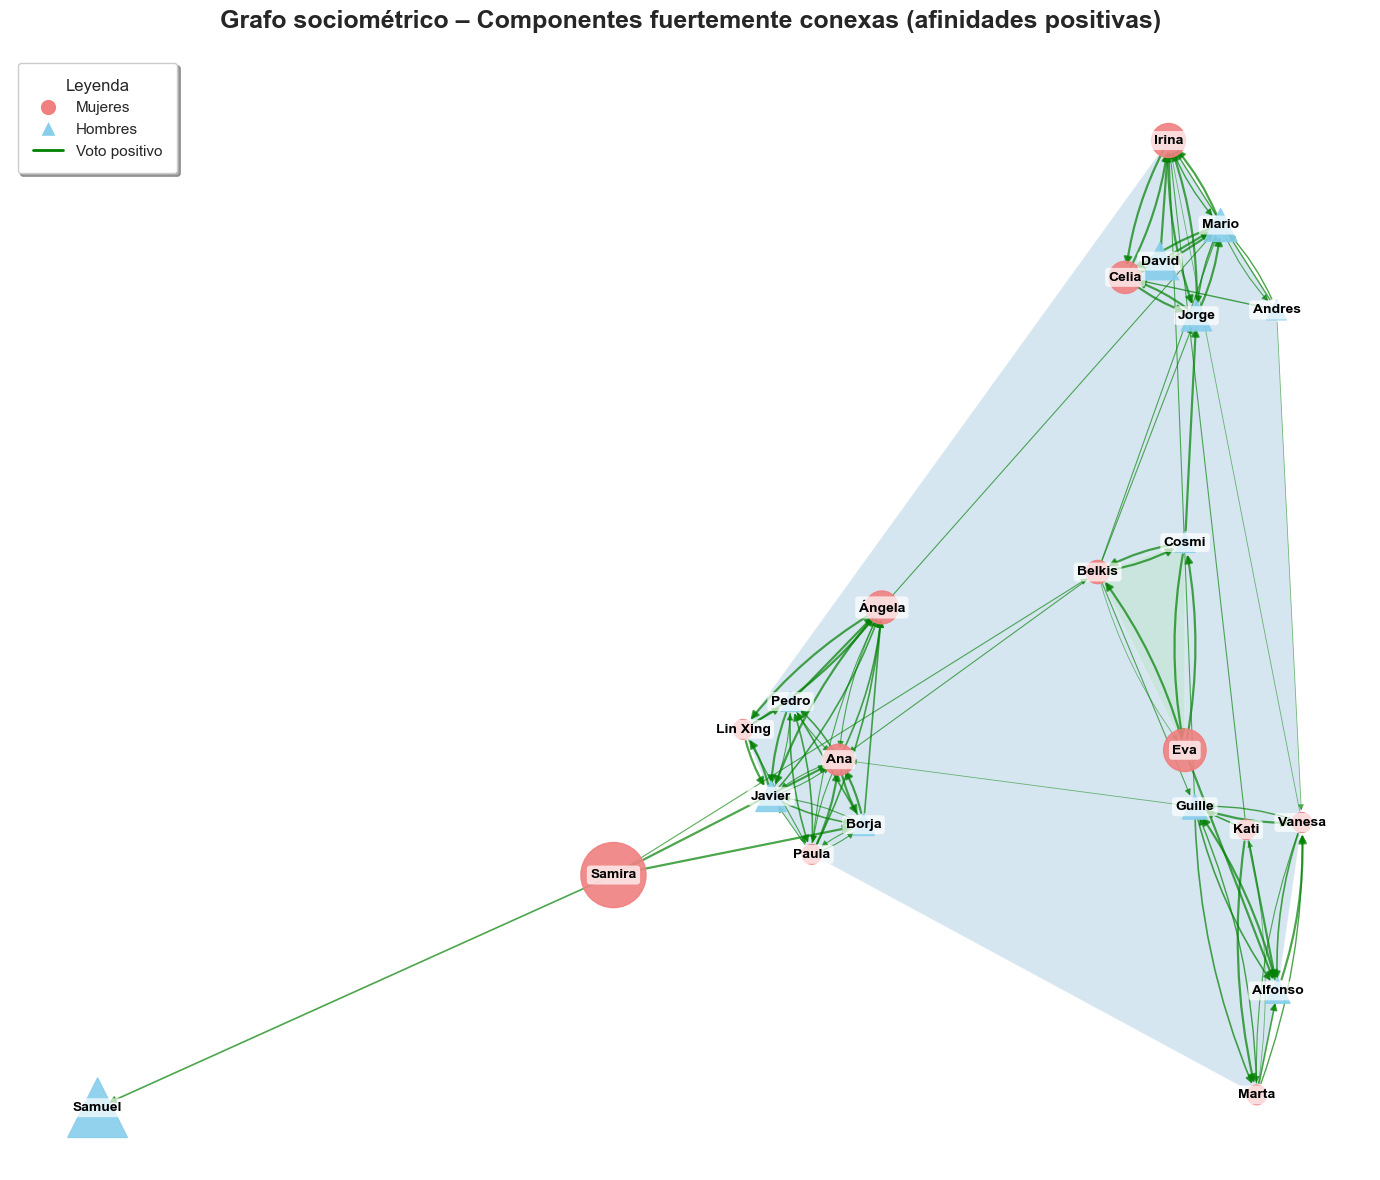

In [9]:
# --- 2️⃣ Normalizamos nombres ---
df_numerico.index = df_numerico.index.str.strip()
df_numerico.columns = df_numerico.columns.str.strip()

# --- 3️⃣ Creamos el grafo solo con aristas positivas ---
G_pos = nx.DiGraph()
aceptacion = df_numerico.sum(axis=1)

# Nodos
for alumno in df_numerico.index:
    genero = 'F' if alumno in mujeres else 'M' if alumno in hombres else 'U'
    G_pos.add_node(alumno, genero=genero, aceptacion=aceptacion.get(alumno, 0))

# Aristas positivas
for votado in df_numerico.index:
    for votante in df_numerico.columns:
        valor = df_numerico.loc[votado, votante]
        if pd.notna(valor) and valor > 0:
            G_pos.add_edge(votante, votado, weight=valor)

# --- 4️⃣ Componentes fuertemente conexas ---
componentes = list(nx.strongly_connected_components(G_pos))
colores_grupo = plt.cm.tab20(np.linspace(0, 1, len(componentes)))  # colores distintos

# --- 5️⃣ Layout (afinidades positivas = proximidad) ---
pos = nx.spring_layout(G_pos, seed=42, k=1.5, iterations=300, weight='weight')

# --- 6️⃣ Figura ---
plt.figure(figsize=(14, 12))
plt.style.use('seaborn-v0_8-white')
ax = plt.gca()

# --- 7️⃣ Nubes de color por componente ---
for i, comp in enumerate(componentes):
    if len(comp) < 2:
        continue
    coords = np.array([pos[n] for n in comp if n in pos])
    if len(coords) >= 3:
        hull = ConvexHull(coords)
        puntos = coords[hull.vertices]
        poly = Polygon(
            puntos, closed=True,
            fill=True, facecolor=colores_grupo[i],
            alpha=0.18, edgecolor=None
        )
        ax.add_patch(poly)
    elif len(coords) == 2:
        mid = coords.mean(axis=0)
        ax.add_patch(plt.Circle(mid, 0.05, color=colores_grupo[i], alpha=0.2))

# --- 8️⃣ Tamaños de nodos ---
tamanos = [max(200, abs(G_pos.nodes[n]['aceptacion']) * 40) for n in G_pos.nodes]

# --- 9️⃣ Dibujamos nodos ---
nx.draw_networkx_nodes(
    G_pos, pos,
    nodelist=[n for n, d in G_pos.nodes(data=True) if d['genero'] == 'F'],
    node_color='lightcoral', node_shape='o',
    node_size=[tamanos[i] for i, n in enumerate(G_pos.nodes) if G_pos.nodes[n]['genero'] == 'F'],
    label='Mujeres', alpha=0.9
)
nx.draw_networkx_nodes(
    G_pos, pos,
    nodelist=[n for n, d in G_pos.nodes(data=True) if d['genero'] == 'M'],
    node_color='skyblue', node_shape='^',
    node_size=[tamanos[i] for i, n in enumerate(G_pos.nodes) if G_pos.nodes[n]['genero'] == 'M'],
    label='Hombres', alpha=0.9
)

# --- 🔟 Aristas positivas ---
for u, v, data in G_pos.edges(data=True):
    w = data['weight']
    nx.draw_networkx_edges(
        G_pos, pos,
        edgelist=[(u, v)],
        width=0.4 + w * 0.4,
        edge_color='green',
        alpha=0.4 + min(w / 4, 0.3),
        connectionstyle='arc3,rad=0.1' if G_pos.has_edge(v, u) else 'arc3,rad=0.0',
        arrows=True,
        arrowstyle='-|>',
        arrowsize=8 + w * 1.2
    )

# --- 11️⃣ Etiquetas de nodos ---
nx.draw_networkx_labels(
    G_pos, pos,
    font_size=10,
    font_weight='bold',
    font_color='black',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.25')
)

# --- 12️⃣ Leyenda ---
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Mujeres',
           markerfacecolor='lightcoral', markersize=12),
    Line2D([0], [0], marker='^', color='w', label='Hombres',
           markerfacecolor='skyblue', markersize=12),
    Line2D([0], [0], color='green', lw=2, label='Voto positivo')
]
plt.legend(
    handles=legend_elements,
    loc='upper left',
    fontsize=11,
    frameon=True,
    title='Leyenda',
    title_fontsize=12,
    fancybox=True,
    shadow=True,
    borderpad=1
)

# --- 13️⃣ Título y ajustes ---
plt.title('Grafo sociométrico – Componentes fuertemente conexas (afinidades positivas)', 
          fontsize=18, weight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('GrafoAceptacion.png')
plt.show()

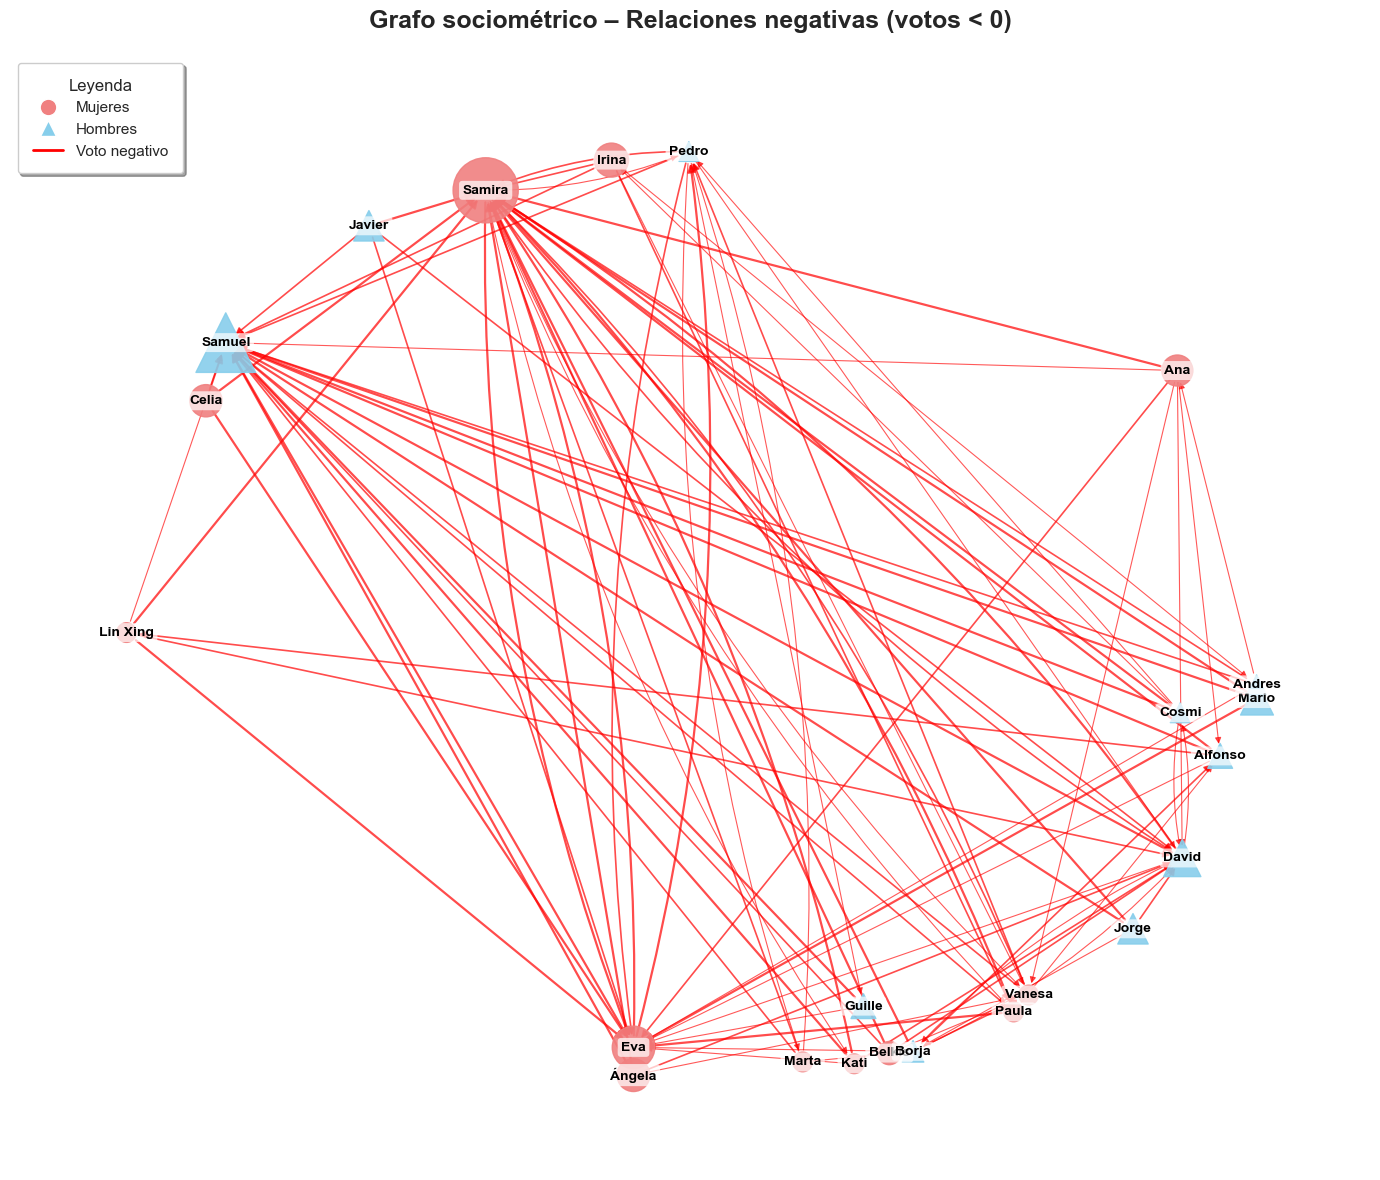

In [10]:
# --- 2️⃣ Normalizamos nombres ---
df_numerico.index = df_numerico.index.str.strip()
df_numerico.columns = df_numerico.columns.str.strip()

# --- 3️⃣ Creamos el grafo solo con aristas NEGATIVAS ---
G_neg = nx.DiGraph()
aceptacion = df_numerico.sum(axis=1)

# Añadimos nodos
for alumno in df_numerico.index:
    genero = 'F' if alumno in mujeres else 'M' if alumno in hombres else 'U'
    G_neg.add_node(alumno, genero=genero, aceptacion=aceptacion.get(alumno, 0))

# Añadimos aristas negativas
for votado in df_numerico.index:
    for votante in df_numerico.columns:
        valor = df_numerico.loc[votado, votante]
        if pd.notna(valor) and valor < 0:
            G_neg.add_edge(votante, votado, weight=valor)

# --- 4️⃣ Layout ---
pos = nx.spring_layout(G_neg, seed=42, k=1.5, iterations=300, weight='weight')

# --- 5️⃣ Figura ---
plt.figure(figsize=(14, 12))
plt.style.use('seaborn-v0_8-white')

# Tamaño de nodos proporcional a aceptación
tamanos = [max(200, abs(G_neg.nodes[n]['aceptacion']) * 40) for n in G_neg.nodes]

# --- 6️⃣ Nodos ---
nx.draw_networkx_nodes(
    G_neg, pos,
    nodelist=[n for n, d in G_neg.nodes(data=True) if d['genero'] == 'F'],
    node_color='lightcoral', node_shape='o',
    node_size=[tamanos[i] for i, n in enumerate(G_neg.nodes) if G_neg.nodes[n]['genero'] == 'F'],
    label='Mujeres', alpha=0.9
)
nx.draw_networkx_nodes(
    G_neg, pos,
    nodelist=[n for n, d in G_neg.nodes(data=True) if d['genero'] == 'M'],
    node_color='skyblue', node_shape='^',
    node_size=[tamanos[i] for i, n in enumerate(G_neg.nodes) if G_neg.nodes[n]['genero'] == 'M'],
    label='Hombres', alpha=0.9
)

# --- 7️⃣ Aristas negativas ---
for u, v, data in G_neg.edges(data=True):
    w = abs(data['weight'])
    nx.draw_networkx_edges(
        G_neg, pos,
        edgelist=[(u, v)],
        width=0.4 + w * 0.4,
        edge_color='red',
        alpha=0.4 + min(w / 4, 0.3),
        connectionstyle='arc3,rad=0.1' if G_neg.has_edge(v, u) else 'arc3,rad=0.0',
        arrows=True,
        arrowstyle='-|>',
        arrowsize=8 + w * 1.2
    )

# --- 8️⃣ Etiquetas ---
nx.draw_networkx_labels(
    G_neg, pos,
    font_size=10,
    font_weight='bold',
    font_color='black',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.25')
)

# --- 9️⃣ Leyenda ---
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Mujeres',
           markerfacecolor='lightcoral', markersize=12),
    Line2D([0], [0], marker='^', color='w', label='Hombres',
           markerfacecolor='skyblue', markersize=12),
    Line2D([0], [0], color='red', lw=2, label='Voto negativo')
]
plt.legend(
    handles=legend_elements,
    loc='upper left',
    fontsize=11,
    frameon=True,
    title='Leyenda',
    title_fontsize=12,
    fancybox=True,
    shadow=True,
    borderpad=1
)

# --- 🔟 Estilo final ---
plt.title('Grafo sociométrico – Relaciones negativas (votos < 0)', 
          fontsize=18, weight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('GrafoNegativo.png')
plt.show()

In [ ]:
from utils.utils import generar_graficos

generar_graficos()

Matriz generada
Gráfico de aceptación generado
Gráfico de aceptación normalizado generado
Grafo sociométrico generado
Grafo de aceptación generado
Grafo de relaciones negativas generado


In [35]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, Spacer, PageBreak, Table
from reportlab.lib.pagesizes import A4
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.enums import TA_JUSTIFY
from datetime import datetime

# Rutas de las imágenes
imagenes = [
    "sociograma_heatmap_corregido.png",  # 0
    "NivelAceptacion.png",               # 1
    "NivelAceptacion100.png",            # 2
    "Grafo1.png",                        # 3
    "GrafoAceptacion.png",               # 4
    "GrafoNegativo.png"                  # 5
]

# Crear documento
nombre_pdf = "Informe_Sociograma.pdf"
pdf = SimpleDocTemplate(nombre_pdf, pagesize=A4)
estilos = getSampleStyleSheet()

# Estilo de texto justificado
estilo_texto = ParagraphStyle(
    name="Justify",
    parent=estilos["Normal"],
    alignment=TA_JUSTIFY,
    leading=15
)

# Lista de elementos del informe
elementos = []

# 🧾 Portada
titulo = Paragraph("<b>Informe de Sociograma</b>", estilos["Title"])

# Imagen centrada
imagen_portada = Image("Portada.jpg", width=250, height=205)
imagen_portada.hAlign = 'CENTER'

# Estilo alineado a la derecha
estilo_derecha = ParagraphStyle(
    name="Derecha",
    parent=estilos["Normal"],
    alignment=2  # 2 = derecha
)

# Textos inferiores (alineados a la derecha)
clase = Paragraph("<b>Clase:</b> Poner clase", estilo_derecha)
fecha = Paragraph(f"<b>Fecha de informe:</b> {datetime.now().strftime('%d/%m/%Y')}", estilo_derecha)

# Añadimos los elementos
elementos.append(Spacer(1, 100))          # espacio superior
elementos.append(titulo)
elementos.append(Spacer(1, 60))
elementos.append(imagen_portada)

# Empuja los textos hacia abajo (ajusta si hace falta)
elementos.append(Spacer(1, 250))

# Añadimos la clase y fecha alineadas a la derecha
elementos.append(clase)
elementos.append(Spacer(1, 10))
elementos.append(fecha)

elementos.append(PageBreak())


# 🔥 1. Heatmap
elementos.append(Paragraph("<b>1. Mapa de calor de votaciones</b>", estilos["Heading1"]))
texto1 = """
El siguiente mapa de calor muestra los resultados agregados de las votaciones entre los alumnos.<br/><br/>
Cada celda representa la valoración que un alumno (<i>columna</i>) realiza sobre otro (<i>fila</i>).
Los alumnos están ordenados de forma decreciente según la puntuación total recibida (<b>sumatorio</b>),
de modo que los alumnos con mayor aceptación aparecen en la parte superior.<br/><br/>

<b>Escala y significado de los valores:</b><br/>
• Los votos provienen de tres actividades en las que cada alumno indicaba si haría o no la actividad con sus compañeros.<br/>
• Un “sí” suma +1 punto, un “no” resta −1, y no votar equivale a 0.<br/>
• El valor total por alumno puede ir de <b>−3</b> (rechazo total) a <b>+3</b> (aceptación total).<br/><br/>

<b>Interpretación de los valores en las celdas:</b><br/>
• <b>3</b> → el votante respondió “sí” en las 3 actividades (máxima afinidad).<br/>
• <b>2</b> → dos “sí” y una respuesta neutra o ausente (afinidad alta).<br/>
• <b>1</b> → un “sí” y dos neutros o negativos (afinidad leve).<br/>
• <b>0</b> → ausencia de voto o balance neutro.<br/>
• <b>−1</b> → un “no” neto (rechazo leve).<br/>
• <b>−2</b> → dos “no” (rechazo claro).<br/>
• <b>−3</b> → tres “no” (rechazo total).<br/><br/>

<b>Casos con signos de exclamación (!):</b><br/>
Estos símbolos indican combinaciones mixtas de respuestas “sí” y “no”, que se transforman internamente en valores intermedios:<br/>
• <b>2!</b> → mapeado a <b>1.5</b>: dos “sí” y un “no”.<br/>
• <b>1!</b>, <b>!!</b>, <b>−1!</b> → mapeados a <b>0.5</b>: respuestas mixtas con ligera tendencia positiva.<br/>
• <b>1!!</b>, <b>−2!</b> → mapeados a <b>−1.5</b>: tendencia negativa.<br/>
Estos valores intermedios permiten representar de manera más precisa la ambigüedad en las votaciones mixtas.<br/><br/>

<b>Paleta de color:</b><br/>
• <font color='green'><b>Verde</b></font> → valoración positiva (afinidad).<br/>
• <font color='red'><b>Rojo</b></font> → valoración negativa (rechazo).<br/>
• <font color='orange'><b>Amarillo</b></font> → respuesta neutra o ambigua.<br/><br/>

<b>Cómo interpretar el gráfico:</b><br/>
• <b>Filas</b> → alumno votado (quién recibe los votos).<br/>
• <b>Columnas</b> → alumno votante (quién emite los votos).<br/>
• Una fila predominantemente verde indica un alumno muy aceptado.<br/>
• Una fila con muchos rojos refleja rechazo generalizado.<br/>
• Una columna con muchos rojos indica un alumno que tiende a votar negativamente.<br/>
• Los bloques verdes diagonales o agrupados sugieren subgrupos de afinidad.<br/><br/>

<b>Nota:</b> los valores en las celdas corresponden a las respuestas originales, preservando los símbolos “!” para mantener la información de los casos mixtos.
"""


elementos.append(Paragraph(texto1, estilo_texto))
elementos.append(Spacer(1, 10))
elementos.append(Image(imagenes[0], width=500, height=500))
elementos.append(PageBreak())

# 💚 2. Niveles de aceptación (en la misma página)
elementos.append(Paragraph("<b>2. Niveles de aceptación</b>", estilos["Heading1"]))
texto2 = """
En esta sección se representan los niveles de aceptación de cada alumno en función de los votos recibidos 
por parte de sus compañeros. La aceptación refleja la valoración global del grupo hacia cada individuo, 
teniendo en cuenta tanto los votos positivos como negativos.  
Los gráficos permiten identificar fácilmente quiénes son los alumnos más valorados (mayor número de votos positivos) 
y aquellos que pueden experimentar menor integración o rechazo social.
"""
elementos.append(Paragraph(texto2, estilo_texto))
elementos.append(Spacer(1, 12))

# --- Gráfico 1: escala original ---
elementos.append(Paragraph("<b>2.1 Nivel de aceptación neto (escala original)</b>", estilos["Heading2"]))
texto21 = """
En este gráfico se muestran los <b>niveles de aceptación neta</b>, es decir, la suma de los votos recibidos por cada alumno.  
Las barras están ordenadas de mayor a menor puntuación, lo que permite identificar rápidamente a los miembros con 
mayor reconocimiento dentro del grupo.  
La <b>escala de color</b> va del <b>verde</b> (mayor aceptación) al <b>rojo</b> (mayor rechazo), 
de acuerdo con la paleta <code>RdYlGn_r</code>.  
Cada barra incluye su puntuación total, y su longitud representa directamente la cantidad de votos netos obtenidos.
"""
elementos.append(Paragraph(texto21, estilo_texto))
elementos.append(Spacer(1, 8))
elementos.append(Image(imagenes[1], width=420, height=300))
elementos.append(Spacer(1, 15))

# --- Gráfico 2: normalizado ---
elementos.append(Paragraph("<b>2.2 Índice de aceptación normalizado (0–100)</b>", estilos["Heading2"]))
texto22 = """
El segundo gráfico muestra los mismos datos transformados en una <b>escala normalizada de 0 a 100</b>.  
Este índice permite comparar los niveles de aceptación entre diferentes grupos o periodos, 
ya que elimina las diferencias debidas a la escala original de votos.  
El alumno con la puntuación más alta se sitúa en 100%, y el de menor puntuación en 0%.  
De nuevo, el gradiente de color verde–rojo facilita una lectura intuitiva: verde indica alta aceptación, 
mientras que tonos anaranjados o rojizos reflejan baja aceptación o posible aislamiento.
"""
elementos.append(Paragraph(texto22, estilo_texto))
elementos.append(Spacer(1, 8))
elementos.append(Image(imagenes[2], width=420, height=300))

# No separamos con salto de página, ambos quedan juntos
elementos.append(Spacer(1, 20))


# 🌐 3. Grafos (uno por fila)
elementos.append(Paragraph("<b>3. Grafos de interacciones sociométricas</b>", estilos["Heading1"]))
intro_grafos = """
En esta sección se presentan tres representaciones gráficas (grafos sociométricos) que muestran las relaciones entre los alumnos 
según las valoraciones que emitieron en la encuesta.  
Cada nodo representa a un alumno, y las conexiones (flechas) indican los votos que ha dado un alumno hacia otro.
El color de la arista refleja el tipo de valoración: <b>verde</b> para votos positivos (afinidad) y <b>rojo</b> para votos negativos (rechazo).  
El tamaño del nodo es proporcional al nivel de aceptación recibido, y la forma distingue el género (<b>círculos rosas</b> para mujeres,
<b>triángulos azules</b> para hombres).  
Los grafos se generan mediante un modelo de fuerzas, de modo que los alumnos con mayor afinidad positiva aparecen más próximos entre sí.
"""
elementos.append(Paragraph(intro_grafos, estilo_texto))
elementos.append(Spacer(1, 15))

# --- Grafo general ---
elementos.append(Paragraph("<b>3.1 Grafo general de interacciones</b>", estilos["Heading2"]))
texto_general = """
Este grafo incluye todas las relaciones entre alumnos, tanto positivas como negativas.  
Permite observar simultáneamente las afinidades y los rechazos dentro del grupo.  
Las flechas verdes representan vínculos positivos y las rojas, vínculos negativos.  
La cercanía entre nodos se debe principalmente a los votos positivos (los alumnos que se aprecian mutuamente tienden a agruparse).
"""
elementos.append(Paragraph(texto_general, estilo_texto))
elementos.append(Spacer(1, 8))
elementos.append(Image(imagenes[3], width=420, height=350))
elementos.append(Spacer(1, 15))

# --- Grafo de aceptación ---
elementos.append(Paragraph("<b>3.2 Grafo de aceptación (relaciones positivas)</b>", estilos["Heading2"]))
texto_positivo = """
En este grafo se muestran exclusivamente las <b>relaciones positivas</b> (votos mayores que cero).  
Los colores de fondo difuminados agrupan a los alumnos en <b>componentes fuertemente conexas</b>,
es decir, subgrupos en los que las relaciones positivas son recíprocas y cohesionadas.  
Este grafo revela los <b>núcleos de afinidad</b> o amistades consolidadas dentro del grupo.
"""
elementos.append(Paragraph(texto_positivo, estilo_texto))
elementos.append(Spacer(1, 8))
elementos.append(Image(imagenes[4], width=420, height=350))
elementos.append(Spacer(1, 15))

# --- Grafo de rechazo ---
elementos.append(Paragraph("<b>3.3 Grafo de rechazo (relaciones negativas)</b>", estilos["Heading2"]))
texto_negativo = """
En este grafo se representan únicamente las <b>relaciones negativas</b> (votos menores que cero).  
Las flechas rojas indican las direcciones del rechazo.  
Los nodos con muchas conexiones salientes pueden estar generando rechazo hacia otros, 
mientras que los que reciben más conexiones entrantes pueden estar experimentando cierta <b>exclusión social</b>.  
El análisis de este grafo ayuda a detectar posibles <b>conflictos o dinámicas grupales desequilibradas</b>.
"""
elementos.append(Paragraph(texto_negativo, estilo_texto))
elementos.append(Spacer(1, 8))
elementos.append(Image(imagenes[5], width=420, height=350))


# Generar PDF
pdf.build(elementos)

print(f"✅ Informe generado correctamente: {nombre_pdf}")


✅ Informe generado correctamente: Informe_Sociograma.pdf
